There is unkown continuse function x: $\rightarrow$ y such that x $\in$ [0,1] and y $\in$ [0,1]

There is function `check_if_below` which for each x,y combination is returning if `False` if the point is above the function or `True` if its below the function.

Your mission is to estimate the area under this function

for example :
for f(x) = x 
we will get 0 for the following points (0.1,0.2), (0.1,0.8),(0.6,0.8) 
and 1 for the following points (0.1,0.05), (0.1,0.02),(0.6,0.1) 


In [1]:
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
sns.set_theme()
from IPython.display import clear_output
import time 
from statsmodels.stats.proportion import proportion_confint



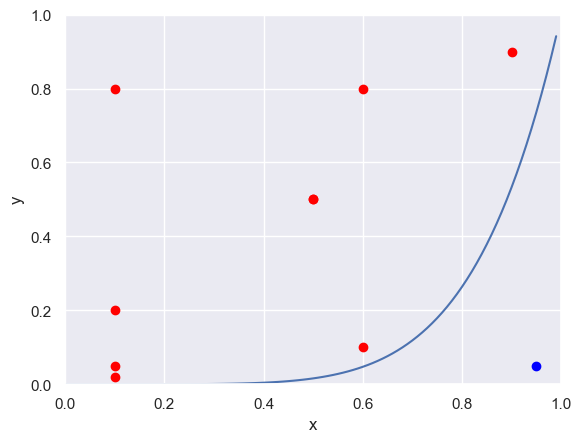

In [2]:
for j in np.arange(0.1,6, 0.03):
    # Defininf function f(x) = x 
    def example_function(x:float):
        return x ** j

    # Creating data 
    x = np.arange(0,1, 0.01)
    y = [example_function(x =i ) for i in x]
    df = pd.DataFrame({"x":x, "y" :y})

    # Ploting f(x) = x line
    sns.lineplot(data=df, x="x", y="y")

    # Defining check_if_below function 
    def check_if_below(x:float,y:float,func):
        y_output = func(x = x)
        return y_output > y

    # Plot below and bove points 
    points = [(0.1,0.2),(0.1,0.8),(0.6,0.8),(0.5,0.5),  (0.5,0.5),
              (0.1,0.05), (0.1,0.02),(0.6,0.1) ,(0.9,0.9),(0.95,0.05) 
             ]
    for x,y in points:
        color = 'blue' if check_if_below(x =x , y =y, func = example_function) else 'red'
        plt.scatter(x, y, c=color)
        
    plt.xlim(0,1)
    plt.ylim(0,1)



    plt.show()
    clear_output(wait=True)
#     time.sleep(1)

In [3]:
# import math
# import numpy as np
# import matplotlib.pyplot as plot

 

# # Get x values of the sine wave
# time = np.arange(0, 100, 0.1);


# # Amplitude of the sine wave is sine of a variable like time
# amplitude   = np.sin(time)

# plot.plot(time/100, amplitude)



# Solutio1 - Monte carlo simulation


The maximum area under the the unknown function is one.
That allows us to use sampeling and estimate the propotion of points that got True. 
So in order to do so the steps are:
1. Sample out of uniform distribution (0,1) n points 
2. Per point test if its fall above or below the unkown function
3. Calculate the proportion of points under the function

For simplicity lets hence that the unknown function is f(x) = x cause we know that the area under this function is 0.5.

In [4]:
def f_x(x:float):return x

In [5]:
# 1. Sampeling 
k = 1000
uniform_sample = [ np.random.uniform(0,1,2) for i in range(k)]

In [6]:
# 2. Per point test if its fall above or below the unkown function
c = 0 
for x,y in uniform_sample:
    c += check_if_below(x =x , y =y ,func = f_x)     

In [7]:
# 3. Calculate the propotion 
p = c/k
print(p)

0.502


So as it's looks like, we are close to the real value, so in order to do better we can increas the the nujmber of sampeld point , or averege results of same n experiments.

Lets increas number of sampels k and see if we doing better in estimation 

In [9]:
# 1 
k = 1000000
uniform_sample = [ np.random.uniform(0,1,2) for i in range(k)]

# 2
c = 0 
for x,y in uniform_sample:
    c += check_if_below(x =x , y =y ,func = f_x)  
    
# 3. Calculate the propotion 
p = c/k
print(p)

0.49962


much closer !

Can we say something about the estimatet area and the real value? (Was asking after presnting the montte carlo simulation)

Sure, we can built confidence intereval for proportion with respect to $\alpha$ (error probability) and say that the real area value is somewhere around the estimated area with some with some confidence.



In [10]:
#calculate 90% confidence interval with 56 successes in 100 trials
alpha = 0.05
ci = proportion_confint(count=c, nobs=k, alpha=alpha)
print(ci)

(0.49864001829074883, 0.5005999817092512)


# Solution 2 - Binary seaerch 

![image](https://d18l82el6cdm1i.cloudfront.net/uploads/bePceUMnSG-binary_search_gif.gif)

In these solution would be determenitic, meaning, that the estimated are would not changhe in differeant iteration with same predifnde parameters.
Here for each x we would like to point on y values till we close enough to the real value.
In order to do so we will use ` Binary search`.



Here we will define some distnace $\epsilon$ for for max distance from true value.

In [11]:
epsilon = 0.001

The following imolementation where taken from - [link](https://www.geeksforgeeks.org/python-program-for-binary-search/#:~:text=def%20binary_search(arr%2C%20low%2C%20high%2C%20x)%3A)

In [12]:
def binary_search(low, high, x, epsilon, func):
     if high >= low:
 
        mid = (high + low) / 2
        if high - low < epsilon:
            return mid
 
        position = check_if_below(x =x , y =mid ,func = func)
        
        if position:
            return binary_search(low = mid, high = high, x = x,  epsilon = epsilon, func = func)
 
        else:
            return binary_search(low = low ,high =  mid, x = x, epsilon = epsilon, func = func)
 


In [13]:
def binary_search_with_plot(low, high, x, epsilon, func):
    
    mid = (high + low) / 2
    
    # plot 
    y = func(x = x)
    plt.scatter(x, y, c='green')
    graph = sns.lineplot(x=x_space, y=x_space)
    graph.axhline(mid, c = 'orange', xmin=x - 0.1, xmax=x + 0.2)
    plt.show()
    clear_output(wait=True)

    if high - low < epsilon:
        return mid

    position = check_if_below(x =x , y =mid ,func = func)

    if position:
        return binary_search_with_plot(low = mid, high = high, x = x,  epsilon = epsilon, func = func)

    else:
        return binary_search_with_plot(low = low ,high =  mid, x = x, epsilon = epsilon, func = func)



In [14]:
x = 0.9
binary_search(low = 0, high = 1, x =x , epsilon = epsilon, func = f_x)


0.89990234375

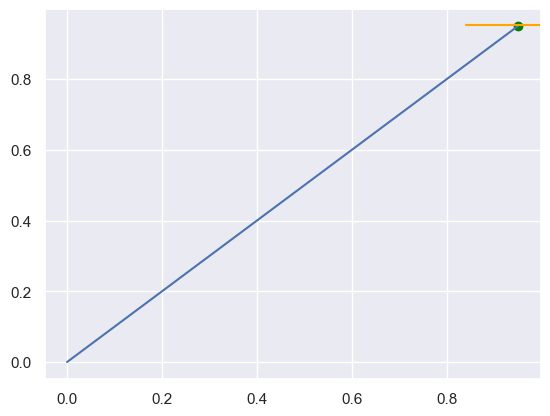

In [15]:
epsilon = 0.05
x_space = np.arange(0,1, epsilon)
y_space = np.arange(0,1, epsilon)
y_hats = []
for x in x_space:
    y_hat = binary_search_with_plot(low = 0, high = 1, x =x , epsilon = epsilon, func = f_x)
    y_hats.append(y_hat)
    


Calculating area under the function 

In [166]:
sum([i * epsilon for i in y_hats])

0.47343750000000007

**Question** : What is the complexity of the abov binary search ? 

**Answer** : 
1. Each iteration the search rang reduced by 0.5 (first (0,1) then (0.5,1) or (0,0.5) etc, so after n iteration, the the search range is $0.5^n$
2. Then stop rule is continue search till the search range is smaller then $\epsilon$
3. So $0.5^n >= \epsilon \rightarrow n = log_{0.5}(\epsilon)$